### доцент к.ф.-м.н  Зарбалиев Сахавет Маилович
##### szarbaliev@mail.ru
### ст. преподаватель к.ф.-м.н. Пепа Руслан Юрьевич
##### r.pepa@my.mgimo.ru

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std 

# Здесь мы просто скачиваем файлы и отображаем исходную таблицу.

In [2]:
fd = pd.read_excel('/Users/ruslanpepa/Documents/МГИМО/2022:2023/Эконометрика/Зарбалие _МС(таблица_1).xlsx',
                   dtype={'Age': np.float64,'Temperature.': np.float64,'SatO2': np.float64,
                          'Neutral.1':np.float64, 'Ctreating. 1':np.float64, 'SRB':np.float64,'fibrinogen': np.float64    })

In [3]:
df = pd.read_excel('/Users/ruslanpepa/Documents/МГИМО/2022:2023/Эконометрика/Готовая таблица_Симушев_2.xlsx')

In [4]:
df.head(1000)

,ФИО,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,Х_Оценка,Диагноз,Клин_Оценка,NEWS-2,NEWS_Оценка
0,Авсеевич Татьяна Васильевна,1,84,2,80.30,58,53,СТ,внебольн.двустор.полисегм.пневм.тяжел теч. ДН II,Т,2,Л
1,Алишоев С.М.,2,46,1,92.22,85,60,СТ,"внебольничная полисегментарная , ДН 0",СТ,2,Л
2,Андреева Галина Михайлова,3,65,2,67.10,83,42,СТ,"внебольн. двусторон. Полисегм пневм, легк.теч....",СТ,1,Л
3,Артемьев Евгений Евгеньевич,4,79,1,126.50,46,61,СТ,"внебольн. двусторон.полисегм.пнемония, тяжелог...",Т,4,Л
4,Астахов Александр Николаевич,5,65,1,109.00,61,88,Т,"внеб.двустор.полисегм.пневм, критическая ст.тя...",Т,8,Т
...,...,...,...,...,...,...,...,...,...,...,...,...
300,Федорова Ольга Лукьяновна,301,67,2,78.50,67,50,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 0-1 ст.,СТ,3,Л
301,Фомичева Антонина Михайловна,302,67,2,88.94,58,56,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,7,Т
302,Харсеева Наталия Вячеславовна,303,45,2,76.10,82,83,Т,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,4,Л
303,Хорькова Татьяна Григорьевна,304,65,2,91.08,57,44,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,3,Л


# Здесь написана функция, которая заменяет качественные показатели на числовые.

In [5]:
# df['X_valuation'] = 
def x_valuation(row):
    if row <= 40:
        return 0 #  легкая форма болезни
    elif 41 <= row <=63:
        return 1 # средней тяжести
    else:
        return 2 # тяжёлая форма 

In [6]:
df['x_valuation'] = df['Критерий Х'].apply(x_valuation)
df.head(1000)

,ФИО,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,Х_Оценка,Диагноз,Клин_Оценка,NEWS-2,NEWS_Оценка,x_valuation
0,Авсеевич Татьяна Васильевна,1,84,2,80.30,58,53,СТ,внебольн.двустор.полисегм.пневм.тяжел теч. ДН II,Т,2,Л,1
1,Алишоев С.М.,2,46,1,92.22,85,60,СТ,"внебольничная полисегментарная , ДН 0",СТ,2,Л,1
2,Андреева Галина Михайлова,3,65,2,67.10,83,42,СТ,"внебольн. двусторон. Полисегм пневм, легк.теч....",СТ,1,Л,1
3,Артемьев Евгений Евгеньевич,4,79,1,126.50,46,61,СТ,"внебольн. двусторон.полисегм.пнемония, тяжелог...",Т,4,Л,1
4,Астахов Александр Николаевич,5,65,1,109.00,61,88,Т,"внеб.двустор.полисегм.пневм, критическая ст.тя...",Т,8,Т,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Федорова Ольга Лукьяновна,301,67,2,78.50,67,50,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 0-1 ст.,СТ,3,Л,1
301,Фомичева Антонина Михайловна,302,67,2,88.94,58,56,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,7,Т,1
302,Харсеева Наталия Вячеславовна,303,45,2,76.10,82,83,Т,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,4,Л,2
303,Хорькова Татьяна Григорьевна,304,65,2,91.08,57,44,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,3,Л,1


# Создаём столбец, который качественную оценку состояния больного ("Л", "СТ", "Т") заменяте на числовые характеристики

In [7]:
def clinic_x_val(row):
    if row == 'Т': # заменяем на "2"
        return 2
    if row == 'Л': # заменяем на 0
        return 0
    else:
        return 1 # заменяем на 1 все значения "СТ"

In [8]:
df['x_clinic'] = df['Клин_Оценка'].apply(clinic_x_val)

In [9]:
df.head(1000) # отображаем таблица для наглядности

,ФИО,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,Х_Оценка,Диагноз,Клин_Оценка,NEWS-2,NEWS_Оценка,x_valuation,x_clinic
0,Авсеевич Татьяна Васильевна,1,84,2,80.30,58,53,СТ,внебольн.двустор.полисегм.пневм.тяжел теч. ДН II,Т,2,Л,1,2
1,Алишоев С.М.,2,46,1,92.22,85,60,СТ,"внебольничная полисегментарная , ДН 0",СТ,2,Л,1,1
2,Андреева Галина Михайлова,3,65,2,67.10,83,42,СТ,"внебольн. двусторон. Полисегм пневм, легк.теч....",СТ,1,Л,1,1
3,Артемьев Евгений Евгеньевич,4,79,1,126.50,46,61,СТ,"внебольн. двусторон.полисегм.пнемония, тяжелог...",Т,4,Л,1,2
4,Астахов Александр Николаевич,5,65,1,109.00,61,88,Т,"внеб.двустор.полисегм.пневм, критическая ст.тя...",Т,8,Т,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Федорова Ольга Лукьяновна,301,67,2,78.50,67,50,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 0-1 ст.,СТ,3,Л,1,1
301,Фомичева Антонина Михайловна,302,67,2,88.94,58,56,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,7,Т,1,1
302,Харсеева Наталия Вячеславовна,303,45,2,76.10,82,83,Т,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,4,Л,2,1
303,Хорькова Татьяна Григорьевна,304,65,2,91.08,57,44,СТ,Внеб.двуст.полисегм.пневм. Средн.тяж.ДН 1 ст.,СТ,3,Л,1,1


# Корреляционная матрица.
### Корреляционая матрица показывает чему равен коэффициент корреляции между показателями, который находится на пересечении названия строки и столбца. Очевидно, что коэффициент корреляции случайной величины с собой равен 1, поэтому на диагональных элементах стоит 1.

# Корреляционная матрица полной таблицы

In [10]:
fd.corr()

,Age,Temperature.,SatO2,Neutral.1,Ctreating. 1,SRB,fibrinogen,№,X,Unnamed: 9
Age,1.000000,-0.106433,0.063765,0.223998,0.154278,0.117060,-0.000475,-0.115439,0.311041,0.311522
Temperature.,-0.106433,1.000000,0.034604,0.057481,0.060753,0.141280,0.026933,-0.042972,0.130540,0.130474
SatO2,0.063765,0.034604,1.000000,0.025191,-0.003320,-0.005950,-0.058231,0.167196,0.045739,0.045049
Neutral.1,0.223998,0.057481,0.025191,1.000000,0.133403,0.379947,0.278052,0.013515,0.504776,0.504391
Ctreating. 1,0.154278,0.060753,-0.003320,0.133403,1.000000,0.090571,0.015796,-0.012244,0.384637,0.383611
SRB,0.117060,0.141280,-0.005950,0.379947,0.090571,1.000000,0.551417,0.040212,0.933010,0.933498
fibrinogen,-0.000475,0.026933,-0.058231,0.278052,0.015796,0.551417,1.000000,0.050329,0.512840,0.513855
№,-0.115439,-0.042972,0.167196,0.013515,-0.012244,0.040212,0.050329,1.000000,0.020259,0.022759
X,0.311041,0.130540,0.045739,0.504776,0.384637,0.933010,0.512840,0.020259,1.000000,0.999849
Unnamed: 9,0.311522,0.130474,0.045049,0.504391,0.383611,0.933498,0.513855,0.022759,0.999849,1.000000


# Корреляционная матрица таблицы, включающая оценки состояния пациента

In [11]:
df.corr()

,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,NEWS-2,x_valuation,x_clinic
№,1.000000,-0.115439,-0.037861,-0.012244,0.067690,0.020259,-0.065219,0.032385,-0.189795
Возраст,-0.115439,1.000000,0.186820,0.154278,-0.545332,0.311041,0.043660,0.344719,0.181210
Пол,-0.037861,0.186820,1.000000,-0.212559,-0.261960,-0.134580,-0.032066,-0.096014,-0.038612
Креат. 1,-0.012244,0.154278,-0.212559,1.000000,-0.736355,0.384637,0.174552,0.323517,-0.003004
рСКФ,0.067690,-0.545332,-0.261960,-0.736355,1.000000,-0.359024,-0.147662,-0.360377,-0.048536
Критерий Х,0.020259,0.311041,-0.134580,0.384637,-0.359024,1.000000,0.284827,0.830423,0.315202
NEWS-2,-0.065219,0.043660,-0.032066,0.174552,-0.147662,0.284827,1.000000,0.251346,0.276233
x_valuation,0.032385,0.344719,-0.096014,0.323517,-0.360377,0.830423,0.251346,1.000000,0.335668
x_clinic,-0.189795,0.181210,-0.038612,-0.003004,-0.048536,0.315202,0.276233,0.335668,1.000000


# <span  style="color:red"> Корреляционная матрица. Коэффициент Спирмена  </span>
### Стандартный коэффициент корреляции очень чувствителен к выбросам. Например, если одно из измерений было сделано по ошибке и дало результат, который не  соответстветсвует ожидаемым значением (как то, температура тела человека имеет отрицательное значение или масса тела отрицательное значение имеет или например произошла ошибка ввода из-за точки, разделяющей десятичную дробь). Даже одно такое ошибочное значение измерения может существо повлиять на коэффициент корреляции, вплоть до изменения знака. Коэффициент Спирмена менее чувствителен к подобной проблеме, поэтому его значение выводим отдельно.

In [62]:
df.corr('spearman')

,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,NEWS-2,x_valuation,x_clinic
№,1.000000,-0.111286,-0.037861,-0.029828,0.079655,0.031128,-0.054212,0.040837,-0.191119
Возраст,-0.111286,1.000000,0.185210,0.093304,-0.536266,0.342135,-0.007494,0.313212,0.153097
Пол,-0.037861,0.185210,1.000000,-0.343412,-0.247428,-0.095736,-0.026881,-0.086859,-0.038722
Креат. 1,-0.029828,0.093304,-0.343412,1.000000,-0.715076,0.361593,0.159496,0.301660,0.006480
рСКФ,0.079655,-0.536266,-0.247428,-0.715076,1.000000,-0.415026,-0.129214,-0.339779,-0.069698
Критерий Х,0.031128,0.342135,-0.095736,0.361593,-0.415026,1.000000,0.298851,0.862168,0.336901
NEWS-2,-0.054212,-0.007494,-0.026881,0.159496,-0.129214,0.298851,1.000000,0.236802,0.254837
x_valuation,0.040837,0.313212,-0.086859,0.301660,-0.339779,0.862168,0.236802,1.000000,0.329381
x_clinic,-0.191119,0.153097,-0.038722,0.006480,-0.069698,0.336901,0.254837,0.329381,1.000000


# <span style="color:red">  Основные характеристики </span>
    
    
### <span style="color:red">  Данная таблица представляет собой описательную статистику каждого из параметров таблица.  </span>
- количество элементов count
- среднее значение mean
- среднее квадратическое отклонение std
- минимальное значение min
- максимальное значние max
- %25;%50;%75 --- соответствующий квартиль 

In [64]:
df.describe()

,№,Возраст,Пол,Креат. 1,рСКФ,Критерий Х,NEWS-2,x_valuation,x_clinic
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,153.000000,64.898361,1.557377,98.443607,63.940984,59.531148,3.390164,1.272131,1.167213
std,88.190136,14.732689,0.497513,27.556727,17.616617,16.325428,1.923342,0.568970,0.415458
min,1.000000,23.000000,1.000000,62.700000,11.000000,29.000000,0.000000,0.000000,0.000000
25%,77.000000,55.000000,1.000000,80.300000,53.000000,47.000000,2.000000,1.000000,1.000000
50%,153.000000,66.000000,2.000000,92.400000,64.000000,56.000000,3.000000,1.000000,1.000000
75%,229.000000,77.000000,2.000000,109.320000,76.000000,68.000000,4.000000,2.000000,1.000000
max,305.000000,95.000000,2.000000,306.510000,113.000000,119.000000,12.000000,2.000000,2.000000


## Внизу представлена картина зависимости одной переменной в столбце от другой.

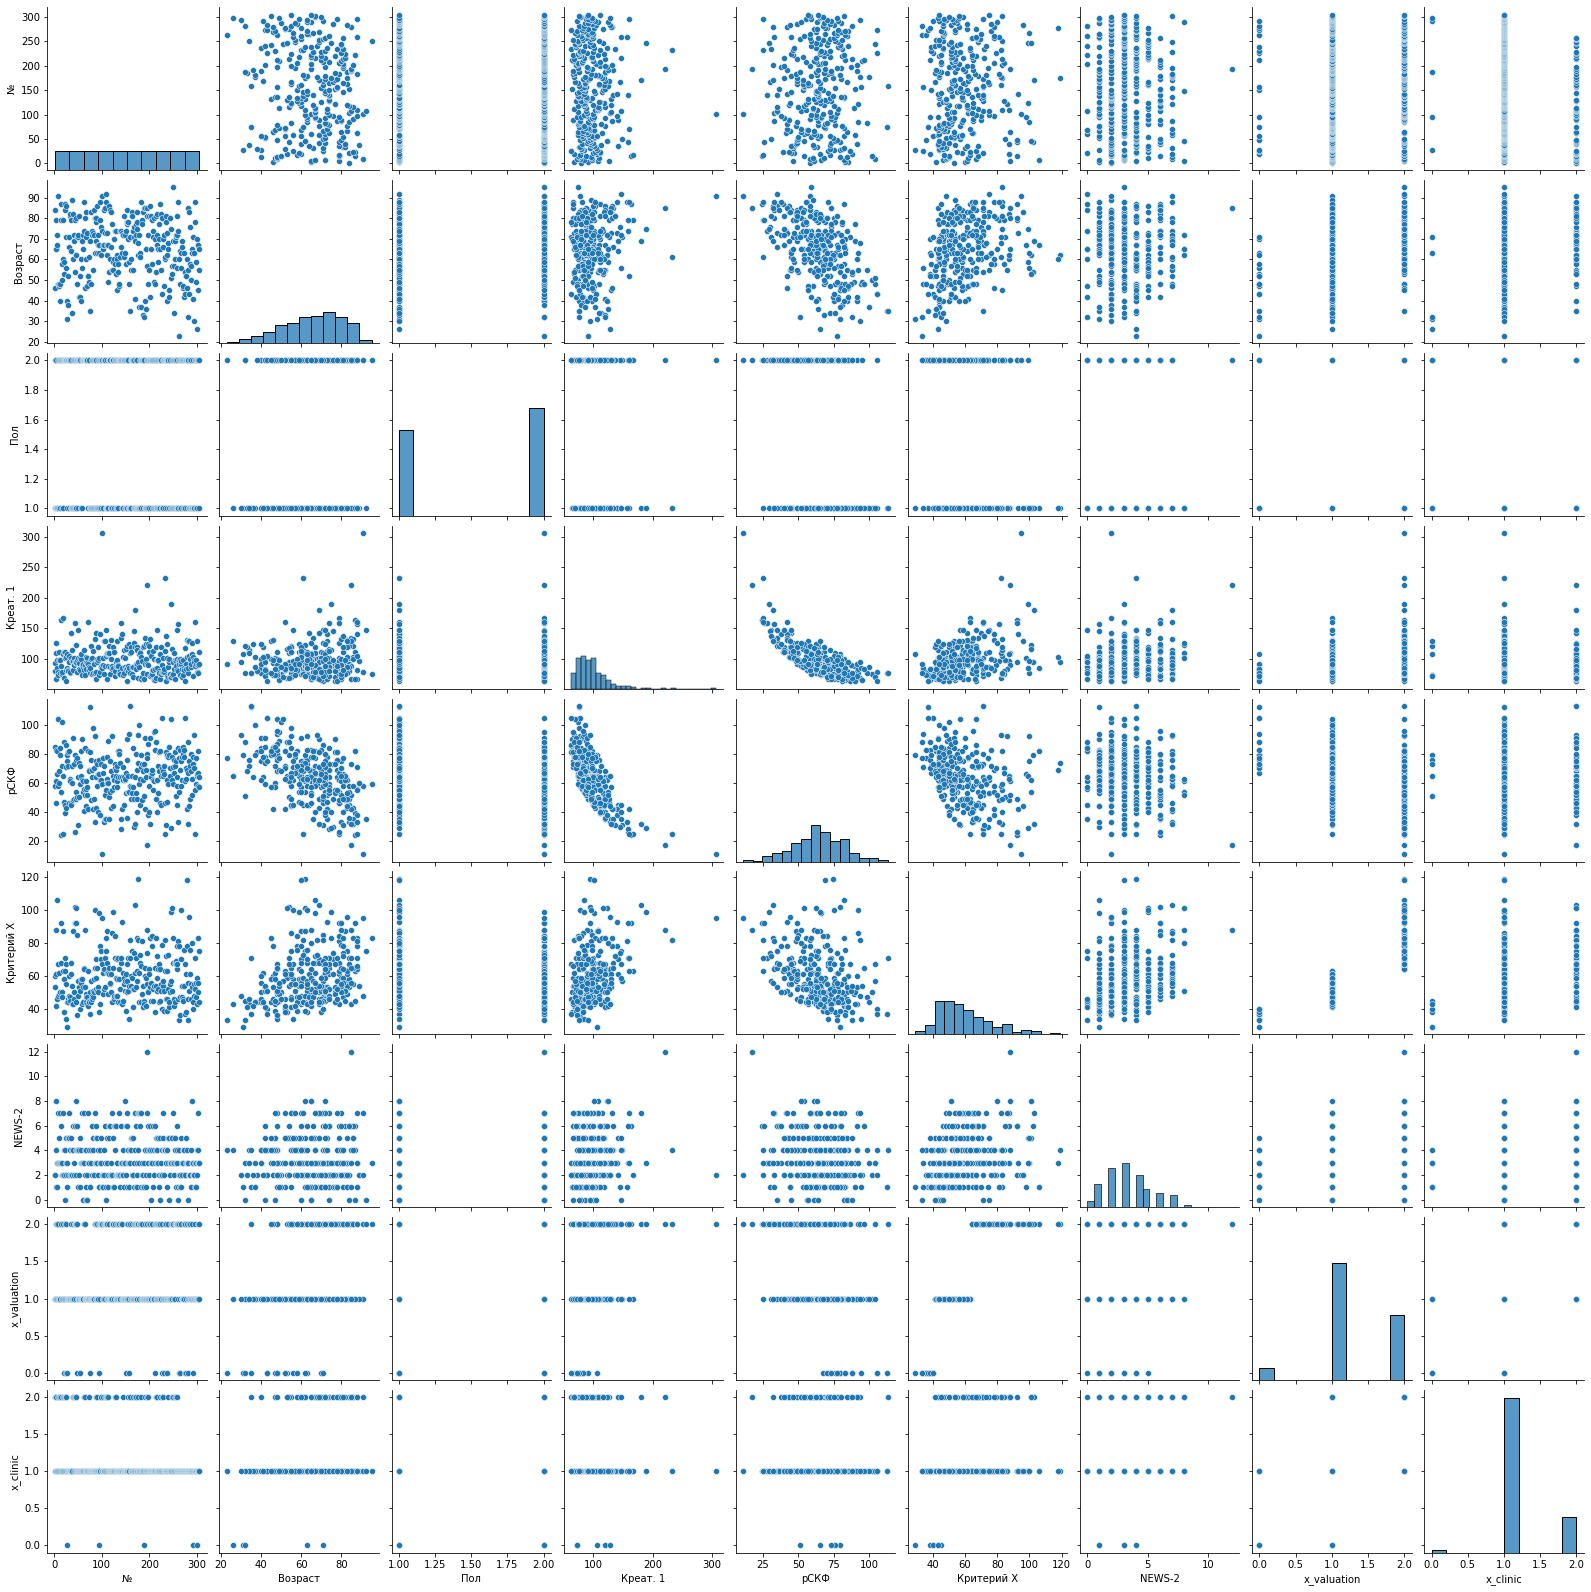

In [65]:
sns.pairplot(df)

# Готовим данные для построения  линейной регрессии вида 

\begin{equation}
x_{clinic} =  \beta_1 x_{valuation}
\end{equation}

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [42]:
X = df[['x_valuation' ]]
y = df['x_clinic']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [56]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               x_clinic   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              1397.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):                   1.12e-115
Time:                        12:53:52   Log-Likelihood:                         -235.51
No. Observations:                 305   AIC:                                      473.0
Df Residuals:                     304   BIC:                                      476.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Таблица
### Данная таблица представляет собой отчёт о регрессии между зависимой переменной "x_clinic", которая определяется вручную. 
 ### Независимая переменная --- это "X-критерий", который вычисляется арифметически по формуле
 \begin{equation}
     X = 0.01(16*Age + 6*Temperature + 8*Sat02 + 13*Neutral.1 + 16*Ctreating. 1 + 26*SRB + 15*Fibrinogen)
 \end{equation}
 
 Результат эконометрического исследования показывает, что оценки коэффициентов линейной регресиии 
 \begin{equation}
x_{clinic} = 
\beta_1 x_{valuation}
\end{equation}
соответсвенно равны
\begin{equation}
\hat{\beta_1} =  0.8057
\end{equation}
- Стандартное отклонение коэффициента $\hat {\beta_1} $ равно $ s_1 = 0.022    $

Коэффициент детерминации данной регрессии равен $R^2 =0.821 $



# Готовим данные для построения  линейной регрессии вида 

\begin{equation}
x_{clinic} = \beta_0 + \beta_1 x_{valuation}
\end{equation}

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [29]:
model = sm.OLS(y_train, X_const.astype(float))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               x_clinic   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     42.80
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.52e-10
Time:                        21:17:31   Log-Likelihood:                -98.676
No. Observations:                 213   AIC:                             201.4
Df Residuals:                     211   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7594      0.066     11.507      

# Таблица
### Данная таблица представляет собой отчёт о регрессии между зависимой переменной "x_clinic", которая определяется вручную. 
 ### Независимая переменная --- это "X-критерий", который вычисляется арифметически по формуле
 \begin{equation}
     X = 0.01(16*Age + 6*Temperature + 8*Sat02 + 13*Neutral.1 + 16*Ctreating. 1 + 26*SRB + 15*Fibrinogen)
 \end{equation}
 
 Результат эконометрического исследования показывает, что оценки коэффициентов линейной регресиии 
 \begin{equation}
x_{clinic} = \beta_0 + \beta_1 x_{valuation}
\end{equation}
соответсвенно равны
\begin{equation}
\hat{\beta_0} = 0.7594 
\end{equation}
\begin{equation}
\hat{\beta_1} = 0.3086
\end{equation}
- Стандартное отклонение коэффициента $\hat {\beta_0} $ равно $ s_0 = 0.066  $
- Стандартное отклонение коэффициента $\hat {\beta_1} $ равно $ s_1 = 0.3086   $

Коэффициент детерминации данной регрессии равен $R^2 =0.169 $

Проверка статистической гипотезы о значимости коэффициентов регрессии с помощью критерия Фишера указывает на значимости регрессии в целом.($F_{st}$)


In [95]:
X = df[['x_clinic' ]]
y = df['x_valuation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            x_valuation   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              1397.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                   1.12e-115
Time:                        13:56:25   Log-Likelihood:                         -271.35
No. Observations:                 305   AIC:                                      544.7
Df Residuals:                     304   BIC:                                      548.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Таблица
### Данная таблица представляет собой отчёт о регрессии между зависимой переменной "X-критерий", которая определяется вручную. 
 ### Независимая переменная --- это "x_clinic", который вычисляется арифметически по формуле
 \begin{equation}
     X = 0.01(16*Age + 6*Temperature + 8*Sat02 + 13*Neutral.1 + 16*Ctreating. 1 + 26*SRB + 15*Fibrinogen)
 \end{equation}
 
 Результат эконометрического исследования показывает, что оценки коэффициентов линейной регресиии 
 \begin{equation}
x_{valuation} = 
\beta_1 x_{clinic} 
\end{equation}
соответсвенно равны
\begin{equation}
\hat{\beta_1} =  1.0192  
\end{equation}
- Стандартное отклонение коэффициента $\hat {\beta_1} $ равно $ s_1 = 0.027   $

Коэффициент детерминации данной регрессии равен $R^2 =0.821 $



In [107]:
X = df[['Критерий Х' ]]
y = df['NEWS-2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 NEWS-2   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              1006.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                    1.98e-98
Time:                        14:38:13   Log-Likelihood:                         -624.83
No. Observations:                 305   AIC:                                      1252.
Df Residuals:                     304   BIC:                                      1255.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Таблица
### Данная таблица представляет собой отчёт о регрессии между зависимой переменной "X-критерий", которая определяется вручную. 
 ### Независимая переменная --- это "NEWS-2", который вычисляется арифметически по формуле
 \begin{equation}
     X = 0.01(16*Age + 6*Temperature + 8*Sat02 + 13*Neutral.1 + 16*Ctreating. 1 + 26*SRB + 15*Fibrinogen)
 \end{equation}
 
 Результат эконометрического исследования показывает, что оценки коэффициентов линейной регресиии 
 \begin{equation}
x_{valuation} = 
\beta_1 x_{clinic} 
\end{equation}
соответсвенно равны
\begin{equation}
\hat{\beta_1} =  0.0553  
\end{equation}
- Стандартное отклонение коэффициента $\hat {\beta_1} $ равно $ s_1 = 0.002   $

Коэффициент детерминации данной регрессии равен $R^2 =0.768 $

